In [2]:
import pandas as pd
data = pd.read_csv("industrial_production.csv", index_col = 0)

In [3]:
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [4]:
#index are date strings. need to convert it to time stamps. 

data.index = pd.to_datetime(data.index)

In [5]:
#rename the column

data.columns = ['Energy Production']

In [6]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [7]:
import matplotlib.pyplot as plt

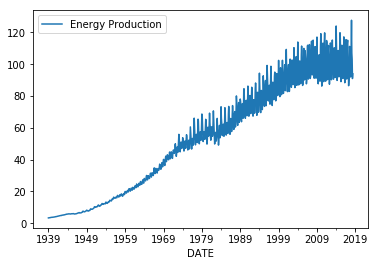

In [8]:
data.plot(label = 'Energy Production till Jan 2018')

In [9]:
#we can see that there is an upward trend
#use statsmodel to decompose our time series into separate components
#statsmodel gives us seasonal, trend and residual components

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model = 'multiplicative')

AttributeError: 'Figure' object has no attribute 'plot'

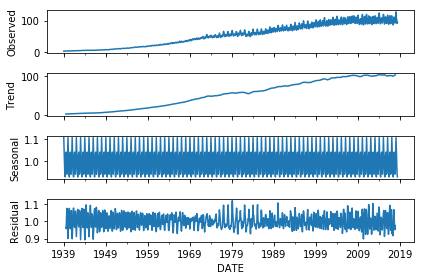

In [22]:
fig = result.plot()
fig.plot()

In [23]:
#we can see the seasonal component and an increasing trend
#better to use seasonal ARIMA in this case 
#choose p,d,q for ARIMA and P,D,Q for seasonal component

#grid search for focusing on parameters
#pyramid-arima library for grid search. it creates a model object that can be fit to the training data
#it has an auto_arima function which will allow us to set ranges for our parameters and fit models for all possible combinations
#model will keep the parameters that reported back the best AIC


In [10]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3726.295, BIC=3750.593, Fit time=2.241 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4046.287, BIC=4065.726, Fit time=0.624 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3848.449, BIC=3867.887, Fit time=0.759 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3725.582, BIC=3754.740, Fit time=2.562 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3887.556, BIC=3911.854, Fit time=1.537 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3718.795, BIC=3752.812, Fit time=3.969 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3842.203, BIC=3871.361, Fit time=3.502 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3715.490, BIC=3754.367, Fit time=9.169 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_orde

In [11]:
#splitting the data to fit stepwise model to the train data
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [12]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [13]:
len(test)

17

In [14]:
future_forecast = stepwise_model.predict(n_periods=17)

In [15]:
print(future_forecast)

[121.69735733 109.59258497  99.95631577  89.82021019  91.37318131
 102.72705732 112.22721038 111.97519805 100.65304485  91.46132095
  95.17762536 111.03880183 120.06990718 110.85590963 101.48399908
  89.7321438   91.42148396]


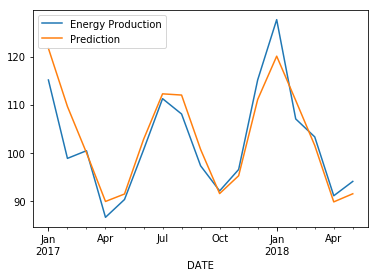

In [16]:
#creating a dataframe and then concatenating it with the previous one

future_forecast = pd.DataFrame(future_forecast,index=test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

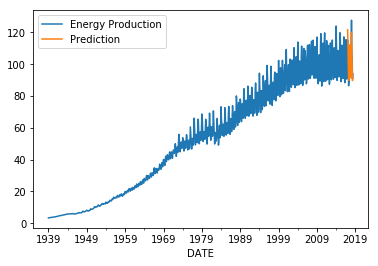

In [17]:
#compare it to the entire dataset to get the bigger picture
pd.concat([data,future_forecast],axis=1).plot()